#MOORING 
#NF-POGO CofE 2023-24

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from seabird.cnv import fCNV
plt.rcParams.update({'font.size': 10,'font.family':'serif','font.serif':'Arial'})

In [53]:
profile = fCNV('sbe37sm-rs232_03710614_2023_10_11_pogo.cnv')

In [54]:
print("Header: %s" % profile.attributes.keys())
print(profile.attributes)

Header: dict_keys(['sbe_model', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])
{'sbe_model': '37SM-RS232', 'nquan': '11', 'nvalues': '1161', 'start_time': "Oct 03 2023 09:39:15 [Instrument's time stamp, first data scan]", 'bad_flag': '-9.990e-29', 'file_type': 'ascii', 'md5': '5ba89cca92036e356a25b263093c41f2', 'datetime': datetime.datetime(2023, 10, 3, 9, 39, 15), 'filename': 'sbe37sm-rs232_03710614_2023_10_11_pogo.cnv'}


In [55]:
print(profile.keys())

['density', 'cond0S/m', 'potemperature', 'prdM', 'PSAL', 'tv290C', 'timeM', 'timeS', 'timeH', 'timeJ', 'flag']


In [56]:
profile['prdM'][:50]

masked_array(data=[-0.102, -0.097, -0.097, -0.09 , -0.084, -0.085, -0.082,
                   -0.078, -0.075, -0.073, -0.072, -0.068, -0.067, -0.066,
                   -0.062, -0.059, -0.058, -0.055, -0.055, -0.053, -0.052,
                   -0.051, -0.051, -0.049, -0.047, -0.045, -0.045, -0.044,
                   -0.042, -0.041, -0.039, -0.039, -0.037, -0.036, -0.035,
                   -0.029, -0.028, -0.03 , -0.029, -0.029, -0.028, -0.027,
                   -0.027, -0.026, -0.024, -0.025, -0.022, -0.019, -0.015,
                   -0.015],
             mask=False,
       fill_value=-9.99e-29)

In [82]:
# Suponha que 'profile' seja um objeto fCNV
import numpy as np

# Defina os limites de tempo desejados
min_time = 278
max_time = 284

# Crie uma máscara para selecionar apenas os dados dentro do intervalo de tempo especificado
mask = (profile['timeJ'] >= min_time) & (profile['timeJ'] <= max_time)

# Extraia as colunas de interesse (por exemplo, 'Temperature' e 'Salinity')
temperature = profile['tv290C'][mask]
salinity = profile['PSAL'][mask]
pressure = profile['prdM']

# Calcule estatísticas descritivas
mean_temperature = np.mean(temperature)
std_temperature = np.std(temperature)
min_temperature = np.min(temperature)
max_temperature = np.max(temperature)

mean_salinity = np.mean(salinity)
std_salinity = np.std(salinity)
min_salinity = np.min(salinity)
max_salinity = np.max(salinity)

mean_pressure = np.mean(pressure)
std_pressure = np.std(pressure)
min_pressure = np.min(pressure)
max_pressure = np.max(pressure)

# Imprima as estatísticas descritivas
print(f"Temperature: Mean={mean_temperature}, Std={std_temperature}, Min={min_temperature}, Max={max_temperature}")
print(f"Salinity: Mean={mean_salinity}, Std={std_salinity}, Min={min_salinity}, Max={max_salinity}")
print(f"Pressure: Mean={mean_pressure}, Std={std_pressure}, Min={min_pressure}, Max={max_pressure}")

Temperature: Mean=16.88648125, Std=0.36275685592892315, Min=16.2291, Max=17.4145
Salinity: Mean=32.39009930555556, Std=0.4131231938375704, Min=29.947, Max=32.8805
Pressure: Mean=1.3828294573643412, Std=0.5496251500254808, Min=-0.102, Max=1.756


In [77]:
print("Temperature mean and standard deviation: %s" % profile['tv290C'].mean(), profile['tv290C'].std())



Temperature mean and standart deviation: 17.42216434108527 1.3129996356987885


In [ ]:
print(profile['tv290C'].mean(), profile['tv290C'].std())
print(profile['PSAL'].mean(), profile['PSAL'].std())
print(profile['PSAL'].min(), profile['PSAL'].max())
print(profile['prdM'].mean(), profile['prdM'].std())

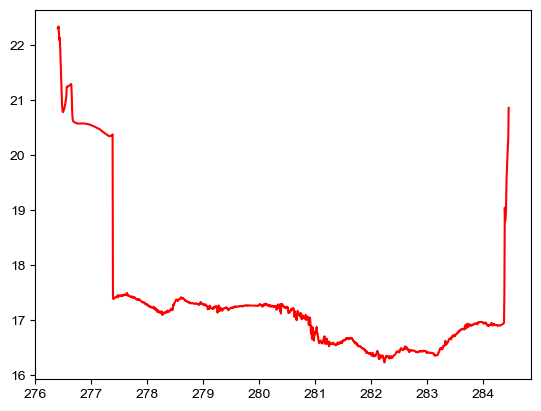

In [10]:
plt.plot(profile['timeJ'], profile['tv290C'],'r')

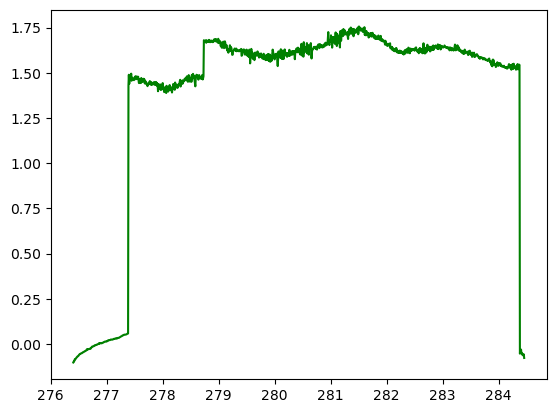

In [38]:
plt.plot(profile['timeJ'], profile['prdM'],'g')

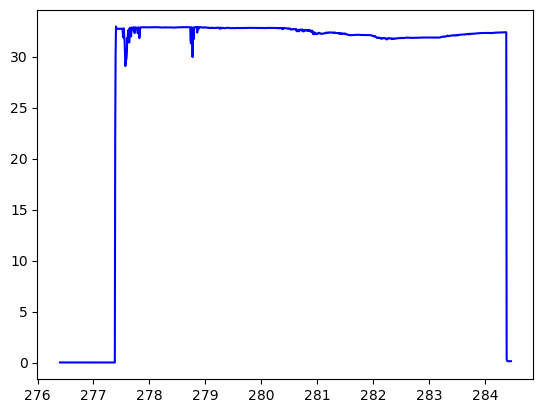

In [39]:
plt.plot(profile['timeJ'], profile['PSAL'],'b')

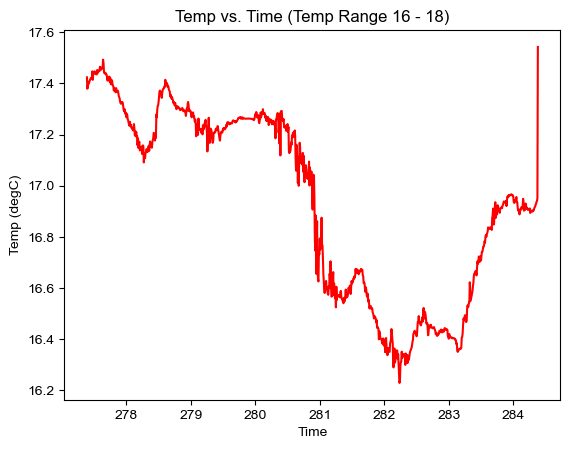

In [13]:
import matplotlib.pyplot as plt

# Assuming 'profile' is your dataset
# Define the range for salinity
salinity_min = 16
salinity_max = 18

# Create a boolean mask for the specified range
mask = (profile['tv290C'] >= salinity_min) & (profile['tv290C'] <= salinity_max)

# Apply the mask to filter the data within the specified range
salinity_filtered = profile['tv290C'][mask]
time_filtered = profile['timeJ'][mask]

# Plot the filtered data
plt.plot(time_filtered, salinity_filtered, 'r')

# Customize labels and titles if needed
plt.xlabel('Time')
plt.ylabel('Temp (degC)')
plt.title('Temp vs. Time (Temp Range 16 - 18)')

# Show the plot
plt.show()


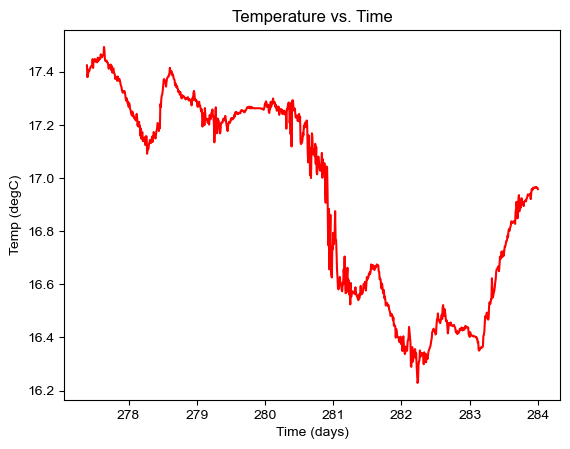

In [65]:
import matplotlib.pyplot as plt

# Define os limites para salinidade e tempo máximo
salinity_min = 16
salinity_max = 18
max_time = 284

# Crie uma máscara para a faixa de salinidade
salinity_mask = (profile['tv290C'] >= salinity_min) & (profile['tv290C'] <= salinity_max)

# Crie uma máscara para o tempo máximo
time_mask = profile['timeJ'] <= max_time

# Combine as duas máscaras usando o operador lógico '&'
combined_mask = salinity_mask & time_mask

# Aplique a máscara combinada para filtrar os dados
salinity_filtered = profile['tv290C'][combined_mask]
time_filtered = profile['timeJ'][combined_mask]

# Plote os dados filtrados
plt.plot(time_filtered, salinity_filtered, 'r')

# Personalize rótulos e títulos, se necessário
plt.xlabel('Time (days)')
plt.ylabel('Temp (degC)')
plt.title('Temperature vs. Time')

# Mostre o gráfico
plt.show()


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
%matplotlib qt5
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10,'font.family':'serif','font.serif':'Arial'})

# Define os limites para salinidade e tempo máximo
salinity_min = 16
salinity_max = 18
max_time = 284

# Crie uma máscara para a faixa de salinidade
salinity_mask = (profile['tv290C'] >= salinity_min) & (profile['tv290C'] <= salinity_max)

# Crie uma máscara para o tempo máximo
time_mask = profile['timeJ'] <= max_time

# Combine as duas máscaras usando o operador lógico '&'
combined_mask = salinity_mask & time_mask

# Aplique a máscara combinada para filtrar os dados
salinity_filtered = profile['tv290C'][combined_mask]
time_filtered = profile['timeJ'][combined_mask]

# Crie um novo eixo x no intervalo de 1 a 7
x_range = np.linspace(1, 7, len(time_filtered))

# Plote os dados filtrados usando o novo eixo x
plt.plot(x_range, salinity_filtered, 'r')

# Personalize rótulos e títulos, se necessário
plt.xlabel('Time (days)')
plt.ylabel('Temp (degC)')
plt.title('Temperature vs. Time')

# Mostre o gráfico
plt.show()

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
%matplotlib qt5
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10,'font.family':'serif','font.serif':'Arial'})

# Define os limites para salinidade e tempo máximo
min_time = 278
max_time = 284

# Crie uma máscara para a faixa de salinidade
#salinity_mask = (profile['tv290C'] >= salinity_min) & (profile['tv290C'] <= salinity_max)

# Crie uma máscara para o tempo máximo
time_mask = (profile['timeJ'] >= min_time) & (profile['timeJ'] <= max_time)

# Combine as duas máscaras usando o operador lógico '&'
combined_mask = time_mask

# Aplique a máscara combinada para filtrar os dados
salinity_filtered = profile['PSAL'][combined_mask]
time_filtered = profile['timeJ'][combined_mask]

# Crie um novo eixo x no intervalo de 1 a 7
x_range = np.linspace(1, 7, len(time_filtered))

# Plote os dados filtrados usando o novo eixo x
plt.plot(x_range, salinity_filtered, 'g')

# Personalize rótulos e títulos, se necessário
plt.xlabel('Time (days)')
plt.ylabel('Salinity (PSU)')
plt.title('Salinity vs. Time')

# Mostre o gráfico
plt.show()

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
%matplotlib qt5
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10,'font.family':'serif','font.serif':'Arial'})

# Define os limites para salinidade e tempo máximo
min_time = 278
max_time = 284

# Crie uma máscara para a faixa de salinidade
#salinity_mask = (profile['tv290C'] >= salinity_min) & (profile['tv290C'] <= salinity_max)

# Crie uma máscara para o tempo máximo
time_mask = (profile['timeJ'] >= min_time) & (profile['timeJ'] <= max_time)

# Combine as duas máscaras usando o operador lógico '&'
combined_mask = time_mask

# Aplique a máscara combinada para filtrar os dados
salinity_filtered = profile['prdM'][combined_mask]
time_filtered = profile['timeJ'][combined_mask]

# Crie um novo eixo x no intervalo de 1 a 7
x_range = np.linspace(1, 7, len(time_filtered))

# Plote os dados filtrados usando o novo eixo x
plt.plot(x_range, salinity_filtered, 'b')

# Personalize rótulos e títulos, se necessário
plt.xlabel('Time (days)')
plt.ylabel('Pressure (dbar)')
plt.title('Pressure vs. Time')

# Mostre o gráfico
plt.show()

Text(0.5, 1.0, 'dhe623_09.cnv')

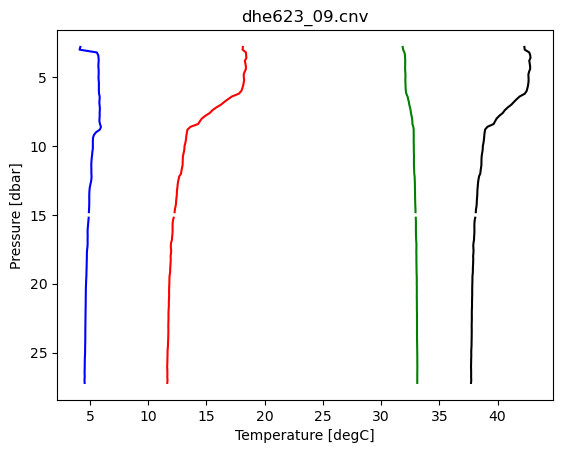

In [9]:
from matplotlib import pyplot as plt

plt.plot(profile['tv290C'], profile['PRES'],'r')
plt.plot(profile['PSAL'], profile['PRES'],'g')
plt.plot(profile['oxygen_ml_L'], profile['PRES'],'b')
plt.plot(profile['c0mS/cm'], profile['PRES'],'black')
#plt.plot(profile['TEMP2'], profile['PRES'],'g')
plt.gca().invert_yaxis()
plt.xlabel('Temperature [degC]')
plt.ylabel('Pressure [dbar]')
plt.title(profile.attributes['filename'])

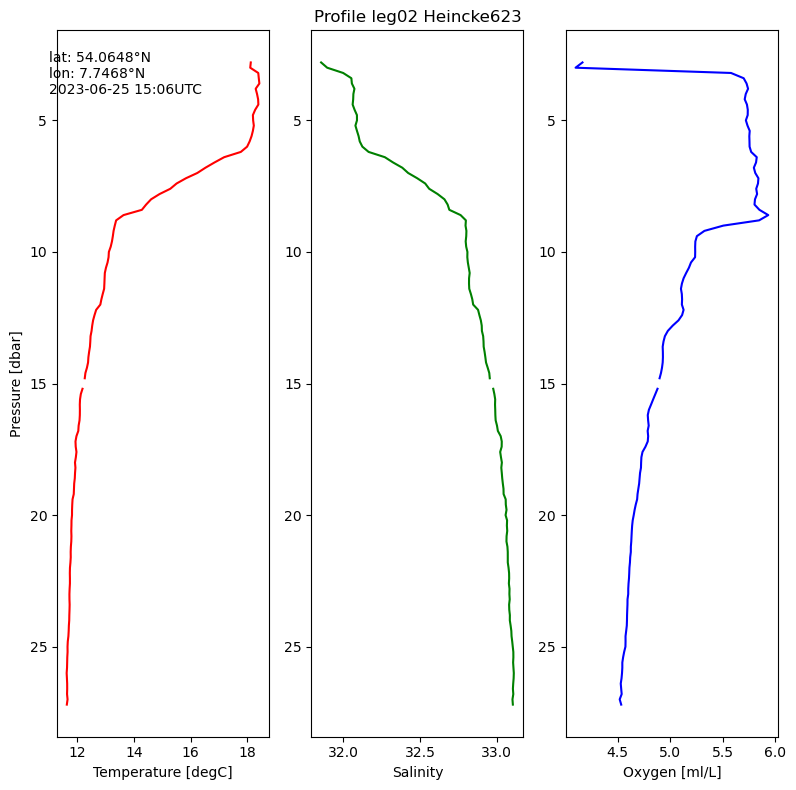

In [64]:
from matplotlib import pyplot as plt

# Cria uma figura com 3 subplots em uma coluna
fig, axs = plt.subplots(1,3, sharex=False, figsize=(8, 8))

# Primeiro gráfico (TEMP vs PRES)
axs[0].plot(profile['TEMP'], profile['PRES'], 'r')
axs[0].invert_yaxis()
axs[0].set_xlabel('Temperature [degC]')
axs[0].set_ylabel('Pressure [dbar]')
axs[0].text(11,4, 'lat: 54.0648°N \nlon: 7.7468°N \n2023-06-25 15:06UTC', fontsize=10, color='black')

# Segundo gráfico (PSAL vs PRES)
axs[1].plot(profile['PSAL'], profile['PRES'], 'g')
axs[1].invert_yaxis()
axs[1].set_xlabel('Salinity')
axs[1].set_title('Profile leg02 Heincke623')

# Terceiro gráfico (oxygen_ml_L vs PRES)
axs[2].plot(profile['oxygen_ml_L'], profile['PRES'], 'b') 
axs[2].invert_yaxis()
axs[2].set_xlabel('Oxygen [ml/L]')

#plot distance 
plt.tight_layout()

# Mostra os gráficos
plt.show()

In [65]:
df = profile.as_DataFrame()
df

,PRES,TEMP,TEMP2,c0mS/cm,c1mS/cm,PSAL,PSAL2,scan,altM,flECO-AFL,...,sbeox1ML/L,v0,v2,v3,v6,nbin,flag,LATITUDE,LONGITUDE,datetime_first_scan
0,2.8,18.1217,18.1734,42.306934,42.353386,31.8551,31.8536,-23.0,19.16,0.3588,...,4.41369,0.9578,3.7709,0.0433,2.0869,1.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
1,3.0,18.1026,18.1231,42.336037,42.362041,31.8947,31.9010,30.0,23.27,0.3983,...,4.33415,1.1632,3.7700,0.0448,2.0730,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
2,3.2,18.3860,18.3078,42.726349,42.682240,31.9989,32.0239,1572.0,28.62,0.8453,...,5.85852,1.4308,3.7633,0.0613,2.6336,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
3,3.4,18.4046,18.3996,42.807793,42.796799,32.0524,32.0469,1803.0,27.13,0.8451,...,6.08042,1.3565,3.7687,0.0613,2.6970,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
4,3.6,18.4248,18.4314,42.830605,42.833023,32.0557,32.0521,1857.0,26.91,0.8545,...,6.10881,1.3455,3.7660,0.0617,2.7074,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,26.4,11.6393,11.6410,37.734219,37.731007,33.1074,33.1026,4397.0,4.49,8.4050,...,4.81832,0.2247,3.1413,0.3413,2.0259,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
119,26.6,11.6403,11.6370,37.733273,37.728283,33.1054,33.1033,4444.0,4.22,7.3961,...,4.83033,0.2109,3.0728,0.3039,2.0250,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
120,26.8,11.6350,11.6351,37.731365,37.725903,33.1080,33.1025,4554.0,4.07,7.3949,...,4.82976,0.2036,3.1110,0.3039,2.0255,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
121,27.0,11.6532,11.6457,37.743584,37.730556,33.1026,33.0966,4976.0,3.83,7.3347,...,4.82434,0.1911,3.0975,0.3016,2.0215,1.0,0.0,54.045833,7.989333,2023-06-26 08:17:21


In [66]:
df.to_csv('df_dhe623_09.csv', index=False)

In [67]:
print(df)

     PRES     TEMP    TEMP2    c0mS/cm    c1mS/cm     PSAL    PSAL2    scan  \
0     2.8  18.1217  18.1734  42.306934  42.353386  31.8551  31.8536   -23.0   
1     3.0  18.1026  18.1231  42.336037  42.362041  31.8947  31.9010    30.0   
2     3.2  18.3860  18.3078  42.726349  42.682240  31.9989  32.0239  1572.0   
3     3.4  18.4046  18.3996  42.807793  42.796799  32.0524  32.0469  1803.0   
4     3.6  18.4248  18.4314  42.830605  42.833023  32.0557  32.0521  1857.0   
..    ...      ...      ...        ...        ...      ...      ...     ...   
118  26.4  11.6393  11.6410  37.734219  37.731007  33.1074  33.1026  4397.0   
119  26.6  11.6403  11.6370  37.733273  37.728283  33.1054  33.1033  4444.0   
120  26.8  11.6350  11.6351  37.731365  37.725903  33.1080  33.1025  4554.0   
121  27.0  11.6532  11.6457  37.743584  37.730556  33.1026  33.0966  4976.0   
122  27.2  11.6275  11.6250  37.722080  37.718929  33.1051  33.1042  5177.0   

      altM  flECO-AFL  ...  sbeox1ML/L      v0     